In [226]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams.update({'font.size': 22})

data = pd.read_csv("Datasets/UMCP_Position_Calibration.txt", sep = " ", header = None, 
                   names=['A', 'B', 'C', 'D', 'Front', 'Back'])

In [247]:
# Find optimal gains

gains = 3*np.random.rand(4,10000)

res = []
for i in range(gains.shape[1]):

    slopeA = gains[0,i]
    slopeB = gains[1,i]
    slopeC = gains[2,i]
    slopeD = gains[3,i]
    data['A_cal'] = slopeA*data['A']
    data['B_cal'] = slopeB*data['B']
    data['C_cal'] = slopeC*data['C']
    data['D_cal'] = slopeD*data['D']
    
    data['X'] = 10*(data['C_cal'] + data['D_cal'] - data['A_cal'] - data['B_cal'])/(data['A_cal'] + data['B_cal'] + data['C_cal'] + data['D_cal']) 
    data['Y'] = 10*(data['B_cal'] + data['C_cal'] - data['A_cal'] - data['D_cal'])/(data['A_cal'] + data['B_cal'] + data['C_cal'] + data['D_cal']) 

    X = pd.DataFrame(data.Front)          
    y = pd.DataFrame(data.X)
    reg = LinearRegression().fit(X, y)          
    y_pred = reg.predict(X) 
    msX = mean_squared_error(y, y_pred)
    #chiX = sum([ ((y.loc[i][0]-y_pred[i][0])/y_pred[i][0])**2 for i in range(len(y)) ])/len(y)
    
    X = pd.DataFrame(data.Back)          
    y = pd.DataFrame(data.Y)
    reg = LinearRegression().fit(X, y)          
    y_pred = reg.predict(X)  
    msY = mean_squared_error(y, y_pred)
    #chiY = sum([ ((y.loc[i][0]-y_pred[i][0])/y_pred[i][0])**2 for i in range(len(y)) ])/len(y) 

    res.append([slopeA, slopeB, slopeC, slopeD, msX + msY])

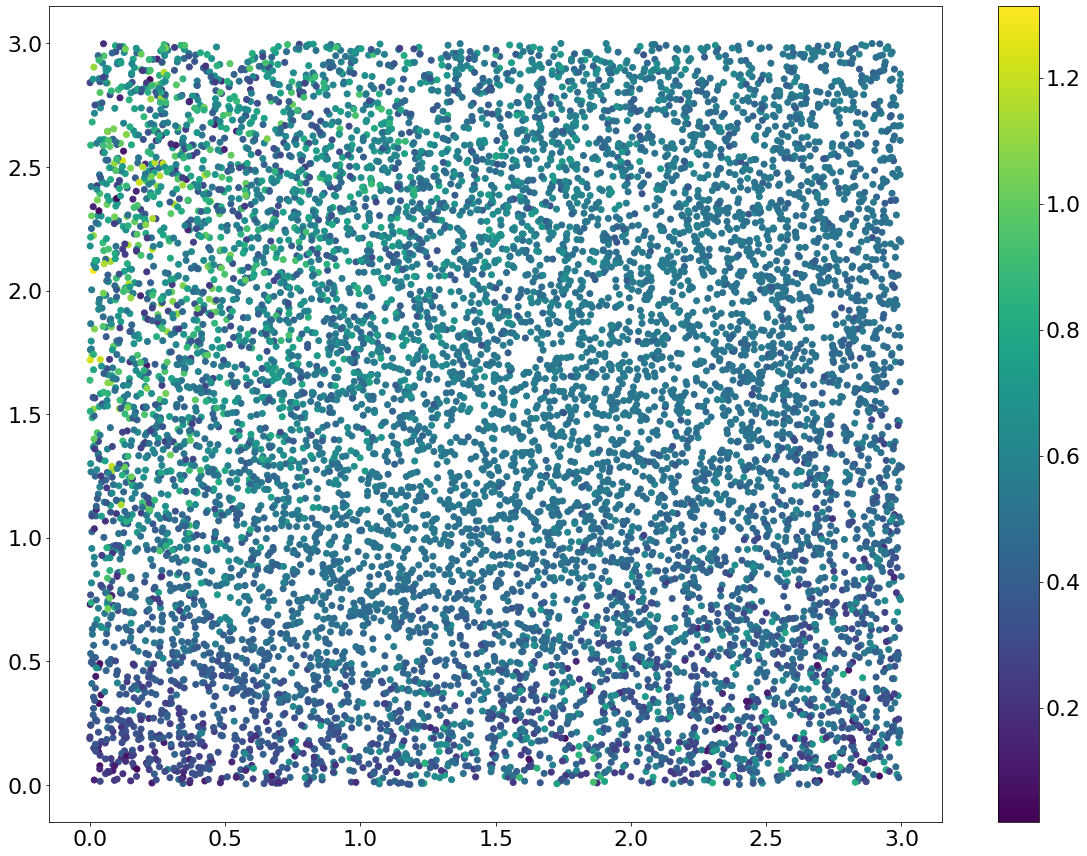

[2.78172019 0.12759621 0.05168653 0.07891563 0.01866475]


In [248]:
# Plotting 2D optimal gains

res = np.asarray(res) 
sc = plt.scatter(res[:,0], res[:,1], c = res[:,4])
plt.colorbar(sc)
plt.show()
optimal = res[np.argmin(res[:,4])]
print(optimal)

Optimal mean square = 0.02
Raw mean square = 0.55


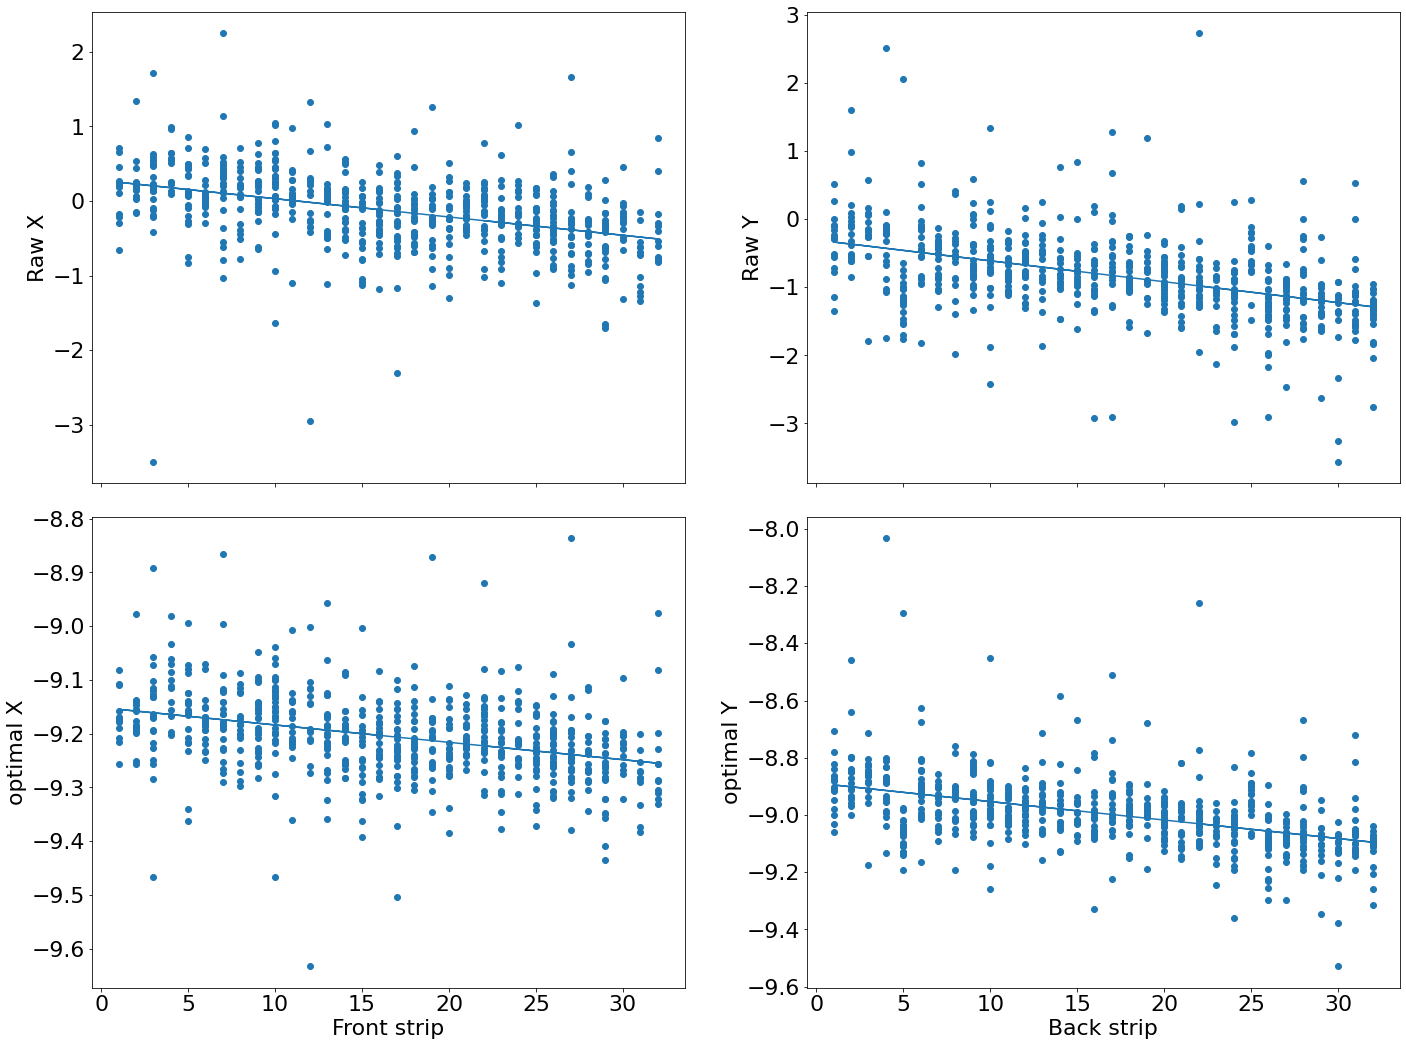

In [249]:
# Comparing no gains vs optimal gains in previous step

slopeA = optimal[0]
slopeB = optimal[1]
slopeC = optimal[2]
slopeD = optimal[3]

data['A_cal'] = slopeA*data['A']
data['B_cal'] = slopeB*data['B']
data['C_cal'] = slopeC*data['C']
data['D_cal'] = slopeD*data['D']

data['X'] = 10*(data['C_cal'] + data['D_cal'] - data['A_cal'] - data['B_cal'])/(data['A_cal'] + data['B_cal'] + data['C_cal'] + data['D_cal']) 
data['Y'] = 10*(data['B_cal'] + data['C_cal'] - data['A_cal'] - data['D_cal'])/(data['A_cal'] + data['B_cal'] + data['C_cal'] + data['D_cal']) 

fig, ax = plt.subplots(2,2, sharex = True)

X = pd.DataFrame(data.Front)          
y = pd.DataFrame(data.X)
ax[1][0].scatter(X, y)
reg = LinearRegression().fit(X, y)          
y_pred = reg.predict(X)     
ax[1][0].plot(X, y_pred)
ax[1][0].set_xlabel('Front strip')
ax[1][0].set_ylabel('optimal X')
msX = mean_squared_error(y, y_pred) 

X = pd.DataFrame(data.Back)          
y = pd.DataFrame(data.Y)
ax[1][1].scatter(X, y)
reg = LinearRegression().fit(X, y)          
y_pred = reg.predict(X)                         
ax[1][1].plot(X, y_pred)
ax[1][1].set_xlabel('Back strip')
ax[1][1].set_ylabel('optimal Y')
msY = mean_squared_error(y, y_pred) 

print("Optimal mean square = {0:.2f}".format(msX + msY))

# Raw ---------------------------

slopeA = 1.0
slopeB = 1.0
slopeC = 1.0
slopeD = 1.0

data['A_cal'] = slopeA*data['A']
data['B_cal'] = slopeB*data['B']
data['C_cal'] = slopeC*data['C']
data['D_cal'] = slopeD*data['D']

data['X'] = 10*(data['C_cal'] + data['D_cal'] - data['A_cal'] - data['B_cal'])/(data['A_cal'] + data['B_cal'] + data['C_cal'] + data['D_cal']) 
data['Y'] = 10*(data['B_cal'] + data['C_cal'] - data['A_cal'] - data['D_cal'])/(data['A_cal'] + data['B_cal'] + data['C_cal'] + data['D_cal']) 

X = pd.DataFrame(data.Front)          
y = pd.DataFrame(data.X)
ax[0][0].scatter(X, y)
reg = LinearRegression().fit(X, y)          
y_pred = reg.predict(X)     
ax[0][0].plot(X, y_pred)
ax[0][0].set_ylabel('Raw X')
msX = mean_squared_error(y, y_pred) 

X = pd.DataFrame(data.Back)          
y = pd.DataFrame(data.Y)
ax[0][1].scatter(X, y)
reg = LinearRegression().fit(X, y)          
y_pred = reg.predict(X)                         
ax[0][1].plot(X, y_pred)
ax[0][1].set_ylabel('Raw Y')
msY = mean_squared_error(y, y_pred) 

print("Raw mean square = {0:.2f}".format(msX + msY))

plt.tight_layout()
plt.show()